## ANÁLISIS EXPLORATORIO DE DATOS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import os
import seaborn as sns
from scipy import stats
import warnings

In [101]:
df_coursera_courses=pd.read_csv(r"Datasets/ParaEDA/Coursera_ETL.csv")
df_coursera_id=pd.read_csv(r"Datasets/Coursera_courses.csv")
df_coursera_reviews=pd.read_csv(r"Datasets/Coursera_reviews.csv")
df_edx_ETL=pd.read_csv(r"Datasets/ParaEDA/edx_ETL.csv")
df_udemy_ETL=pd.read_csv(r"Datasets/ParaEDA/udemy_ETL.csv")

In [4]:
warnings.filterwarnings('ignore')
#import os: La instrucción import os importa el módulo "os" en Python.
#  El módulo "os" proporciona funciones para interactuar con el sistema operativo,
#  como acceder a variables de entorno, manipular rutas de archivos,
#  ejecutar comandos del sistema, entre otros. Al importar el módulo "os", 
# se habilita el uso de estas funciones en el programa.

#warnings.filterwarnings('ignore'): La función warnings.filterwarnings()se utiliza
#  para filtrar o controlar las advertencias que se emiten durante la ejecución del programa.
#  Al pasar 'ignore' como argumento, se indica a Python que ignore todas las advertencias y no las muestre en la salida.

### COURSERA

In [5]:
df_coursera_courses.describe(include=['object']).T

,count,unique,top,freq
name,888,888,(ISC)² Systems Security Certified Practitioner...,1
institution,888,154,University of Pennsylvania,59
course_type,888,3,COURSE,581
course_difficulty,888,4,Beginner,485
platform,888,1,coursera,888
language,888,17,en,714


In [6]:
np.sort(df_coursera_courses.rating.unique())

array([3.3, 3.7, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9,
       5. ])

In [154]:
np.sort(df_coursera_courses.language.unique())

array(['Other', 'bg', 'da', 'de', 'en', 'es', 'fr', 'hu', 'id', 'it',
       'lt', 'nl', 'no', 'pl', 'pt', 'ro', 'ru'], dtype=object)

In [7]:
df_coursera_courses.head(2)

,name,institution,course_type,rating,course_difficulty,enrolled,platform,language
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5300,coursera,en
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17000,coursera,en


#### `rating`: Creo una Distribución de calificación básica

Text(0.5, 1.0, '\nDistribución de Rating en Coursera\n')

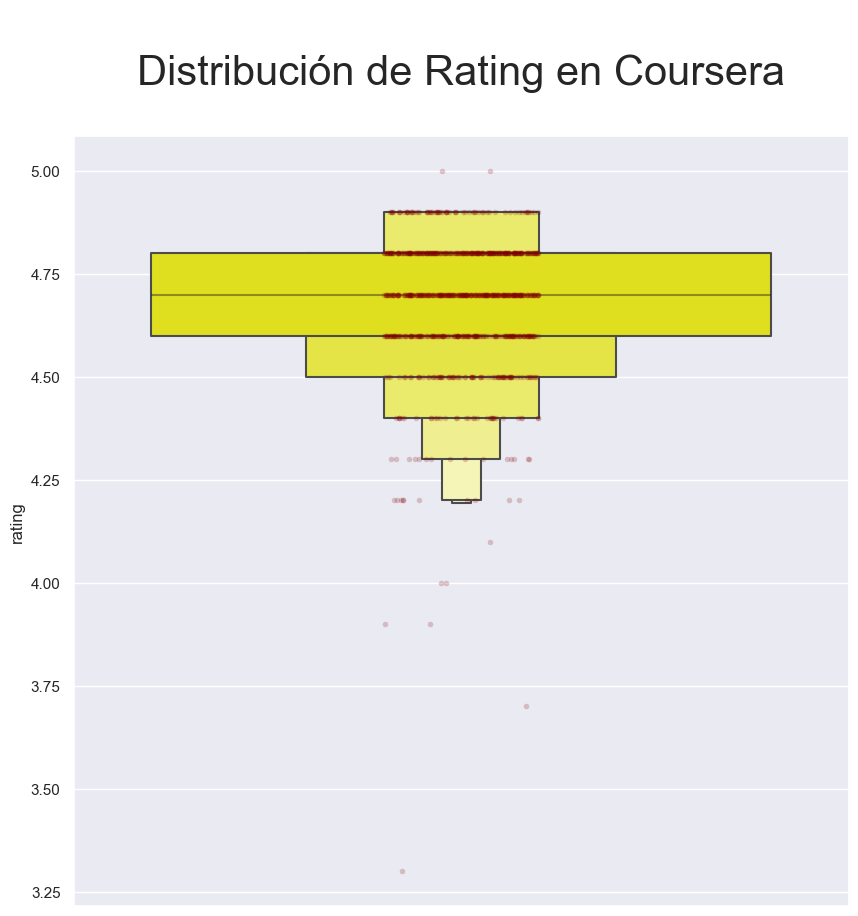

In [8]:
sns.set(rc={'figure.figsize':(10,10)})
ax = sns.boxenplot( y="rating", data=df_coursera_courses,
                   showfliers=False,color='yellow')
ax = sns.stripplot( y="rating", data=df_coursera_courses,
                   size=4, color="maroon",alpha=0.2)
ax.axes.set_title("\nDistribución de Rating en Coursera\n",fontsize=30)


Realizo un trazado de calificación para obtener una visión general de la distribución. Esto es un histograma con una línea de ajuste de una distribución gamma.  
Histograma: El histograma representa la distribución de los datos de la columna 'course_rating'. Cada barra del histograma muestra la frecuencia o el conteo de datos dentro de un intervalo específico. En este caso, el eje x del histograma representa los valores de calificación del curso, mientras que el eje y muestra la frecuencia o conteo de ocurrencias para cada intervalo.  
Línea de ajuste: La línea roja trazada sobre el histograma representa la distribución gamma ajustada a los datos. La distribución gamma es un modelo matemático que se utiliza para describir diversos fenómenos en estadística. El ajuste de la distribución gamma a los datos implica encontrar los parámetros que mejor se ajustan a la distribución de las calificaciones del curso.


Text(0.5, 1.0, '\nDistrubucion de Rating en Coursera\n')

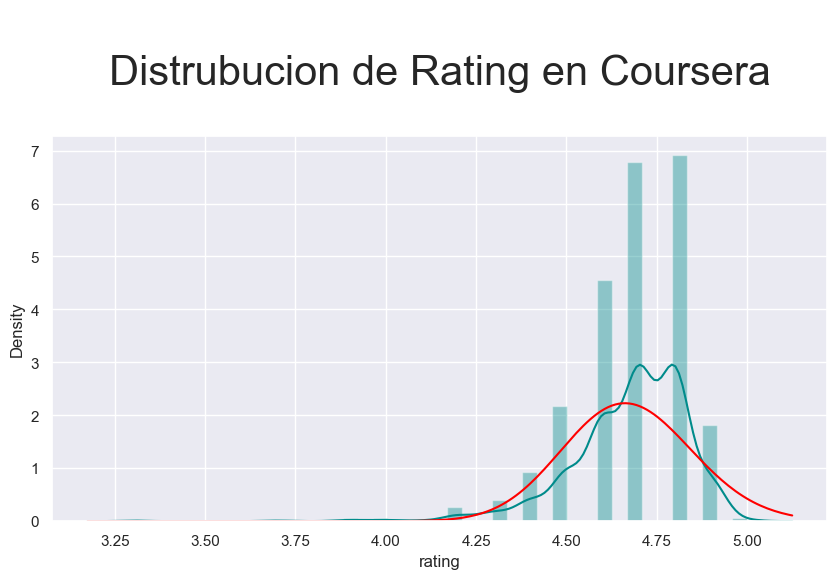

In [10]:
sns.set(rc={'figure.figsize':(10,5)})
p=sns.distplot(df_coursera_courses['rating'],color='darkcyan',fit_kws={"color":"red"},fit=stats.gamma, label="label 1")
p.axes.set_title("\nDistrubucion de Rating en Coursera\n",fontsize=30)

#### `Diff-Rating`: Realizo un grafico mostrando la frecuencia segun la dificultad (Relacion Rating - Dificultad).

Text(0.5, 1.0, '\nDistribucion de frecuencias basada en la Dificultad\n')

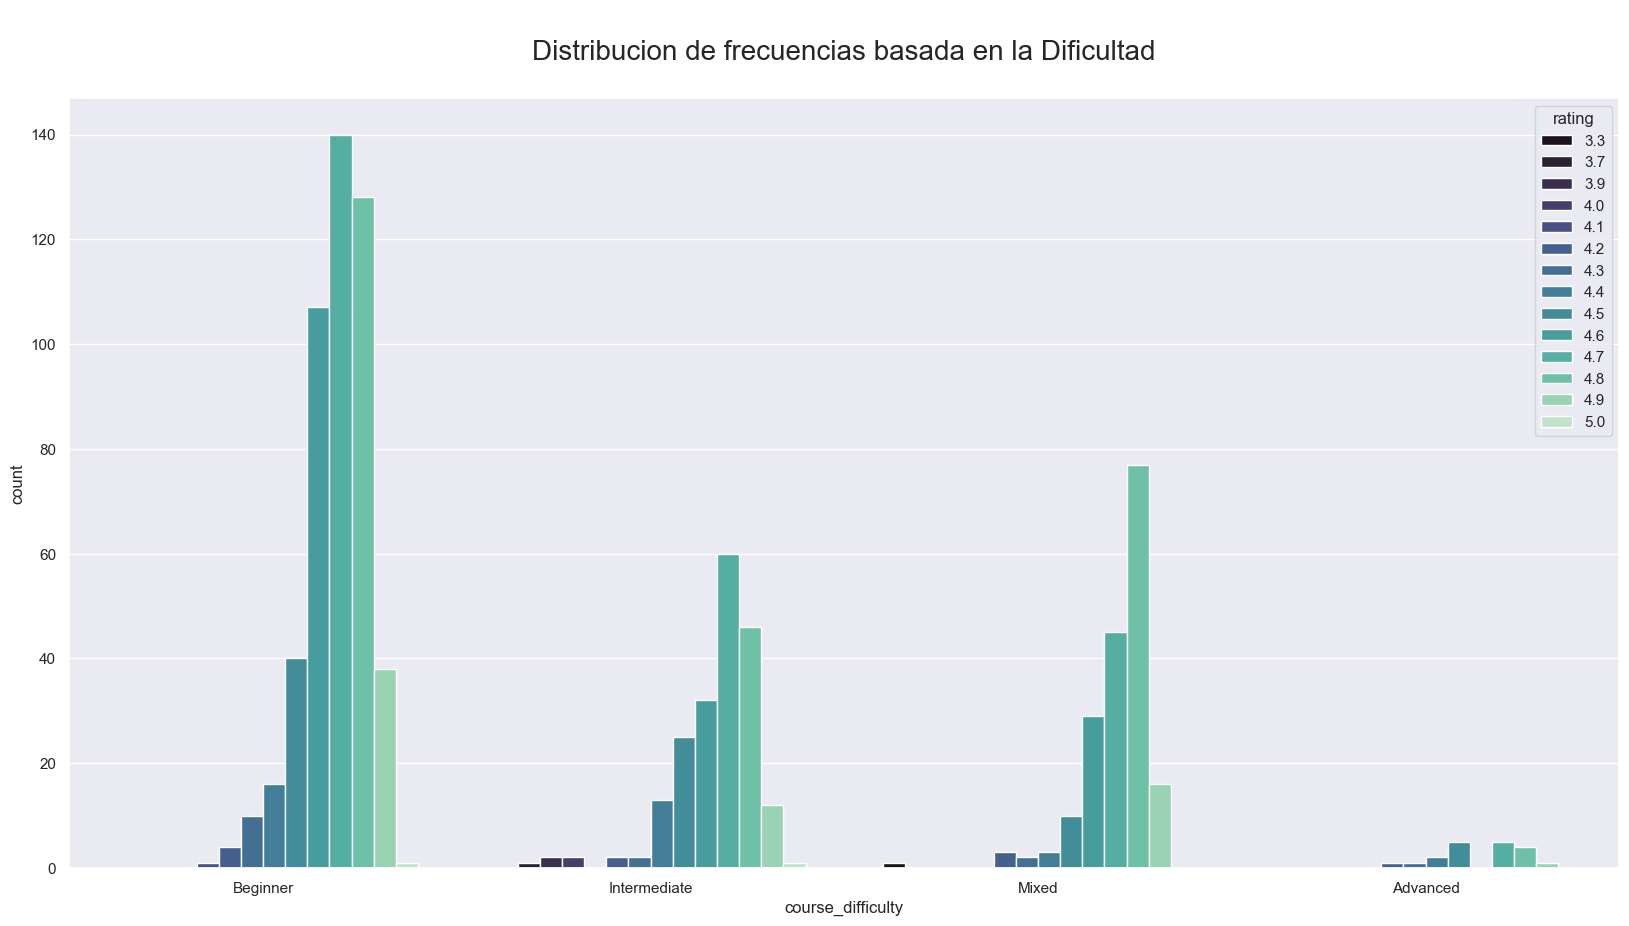

In [11]:
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.countplot(hue="rating", x="course_difficulty", data=df_coursera_courses,palette="mako")
ax.axes.set_title("\nDistribucion de frecuencias basada en la Dificultad\n",fontsize=20)

#### `Cursos - Idioma`: Busco cual es la relacion entre cantidad de cursos por idioma.

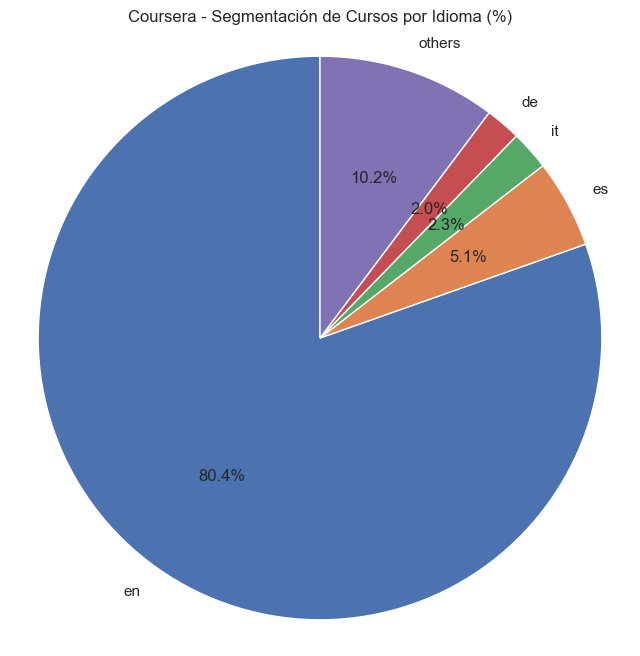

In [33]:
plt.figure(figsize=(8, 8))
df_language_counts = df_coursera_courses['language'].value_counts()

# Obtener el top 4 de idiomas y la suma de los demás idiomas
top_languages = df_language_counts.head(4).index
others_count = df_language_counts.loc[~df_language_counts.index.isin(top_languages)].sum()

# Crear una lista de frecuencias para el gráfico
language_counts = list(df_language_counts.head(4))
language_counts.append(others_count)

# Crear una lista de etiquetas para el gráfico
language_labels = list(top_languages)
language_labels.append('others')

# Crear el gráfico de pastel
plt.pie(language_counts, labels=language_labels, autopct='%1.1f%%', startangle=90)
plt.title('Coursera - Segmentación de Cursos por Idioma (%)')
plt.axis('equal')
plt.show()


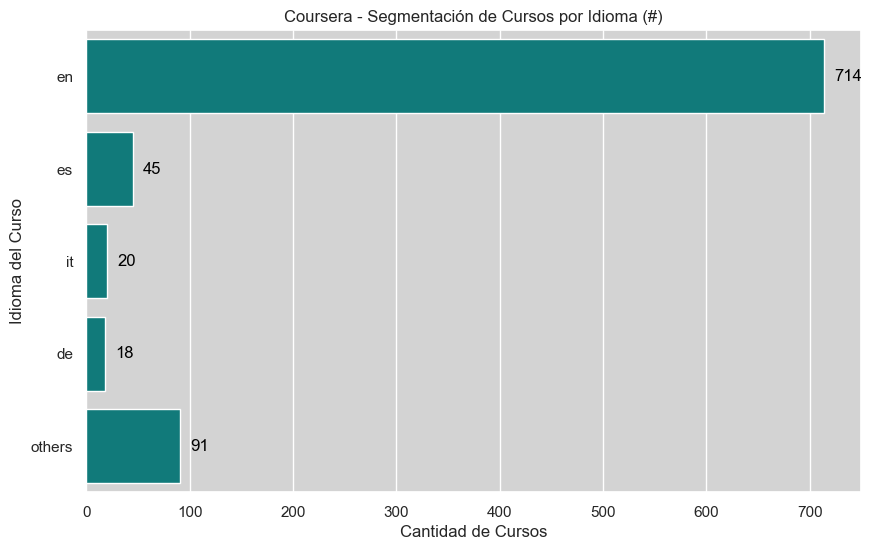

In [34]:
plt.figure(figsize=(10, 6))
df_language_counts = df_coursera_courses['language'].value_counts()

# Obtener el top 4 de idiomas y la suma de los demás idiomas
top_languages = df_language_counts.head(4).index
others_count = df_language_counts.loc[~df_language_counts.index.isin(top_languages)].sum()

# Crear un nuevo dataframe para el gráfico
df_plot = df_language_counts.head(4).to_frame()
df_plot.loc['others'] = others_count

# Crear el gráfico de barras horizontales
ax = sns.barplot(x=df_plot.values.flatten(), y=df_plot.index, color='darkcyan')

# Añadir etiquetas con la cantidad de inscritos en las barras
for i, v in enumerate(df_plot.values.flatten()):
    ax.text(v + 10, i, str(v), color='black', ha='left', va='center')

# Cambiar el color de fondo del gráfico
ax.set_facecolor('lightgray')

# Etiquetas y título del gráfico
plt.xlabel('Cantidad de Cursos')
plt.ylabel('Idioma del Curso')
plt.title('Coursera - Segmentación de Cursos por Idioma (#)')

plt.show()


#### `Cursos - Institucion`: Busco la relacion entre cursos por institucion.

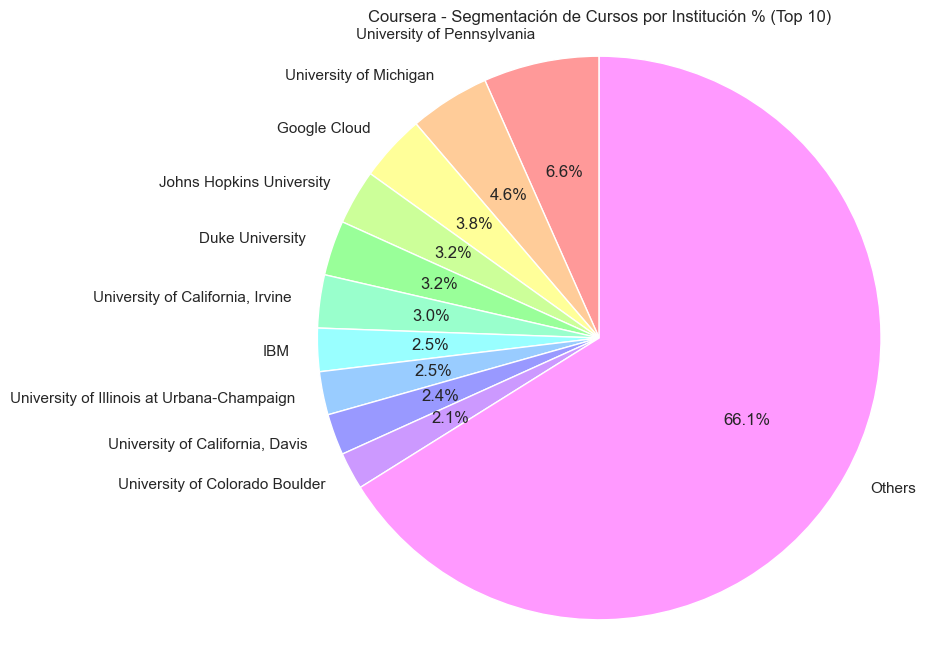

In [46]:

plt.figure(figsize=(8, 8))
df_institution_counts = df_coursera_courses['institution'].value_counts()

# Obtener el top 4 de instituciones y la suma de las demás instituciones
top_institutions = df_institution_counts.head(10).index
others_count = df_institution_counts.loc[~df_institution_counts.index.isin(top_institutions)].sum()

# Crear una lista de frecuencias para el gráfico
institution_counts = list(df_institution_counts.head(10))
institution_counts.append(others_count)

# Crear una lista de etiquetas para el gráfico
institution_labels = list(top_institutions)
institution_labels.append('Others')

# Crear una paleta de colores personalizada
colors = ['#FF9999', '#FFCC99', '#FFFF99', '#CCFF99', '#99FF99', '#99FFCC', '#99FFFF', '#99CCFF', '#9999FF', '#CC99FF', '#FF99FF']

# Crear el gráfico de pastel con colores personalizados
plt.pie(institution_counts, labels=institution_labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Coursera - Segmentación de Cursos por Institución % (Top 10)')
plt.axis('equal')
plt.show()


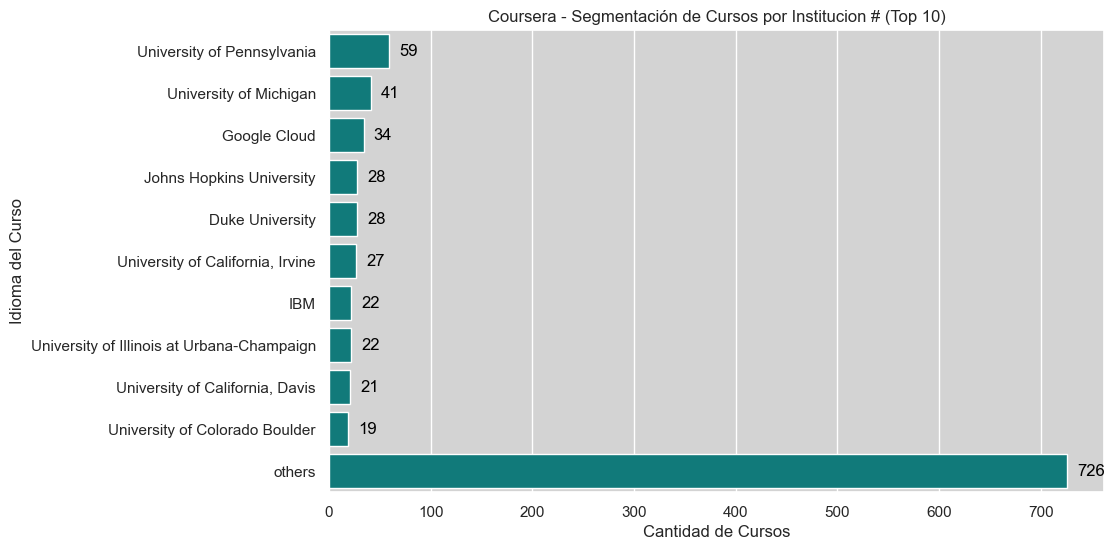

In [47]:
plt.figure(figsize=(10, 6))
df_language_counts = df_coursera_courses['institution'].value_counts()

# Obtener el top 4 de idiomas y la suma de los demás idiomas
top_languages = df_language_counts.head(4).index
others_count = df_language_counts.loc[~df_language_counts.index.isin(top_languages)].sum()

# Crear un nuevo dataframe para el gráfico
df_plot = df_language_counts.head(10).to_frame()
df_plot.loc['others'] = others_count

# Crear el gráfico de barras horizontales
ax = sns.barplot(x=df_plot.values.flatten(), y=df_plot.index, color='darkcyan')

# Añadir etiquetas con la cantidad de inscritos en las barras
for i, v in enumerate(df_plot.values.flatten()):
    ax.text(v + 10, i, str(v), color='black', ha='left', va='center')

# Cambiar el color de fondo del gráfico
ax.set_facecolor('lightgray')

# Etiquetas y título del gráfico
plt.xlabel('Cantidad de Cursos')
plt.ylabel('Idioma del Curso')
plt.title('Coursera - Segmentación de Cursos por Institucion # (Top 10)')

plt.show()

#### `Rating-Institucion`: Busco la relacion entre el raiting por cada institucion.

Mejores 10 instituciones por ranking

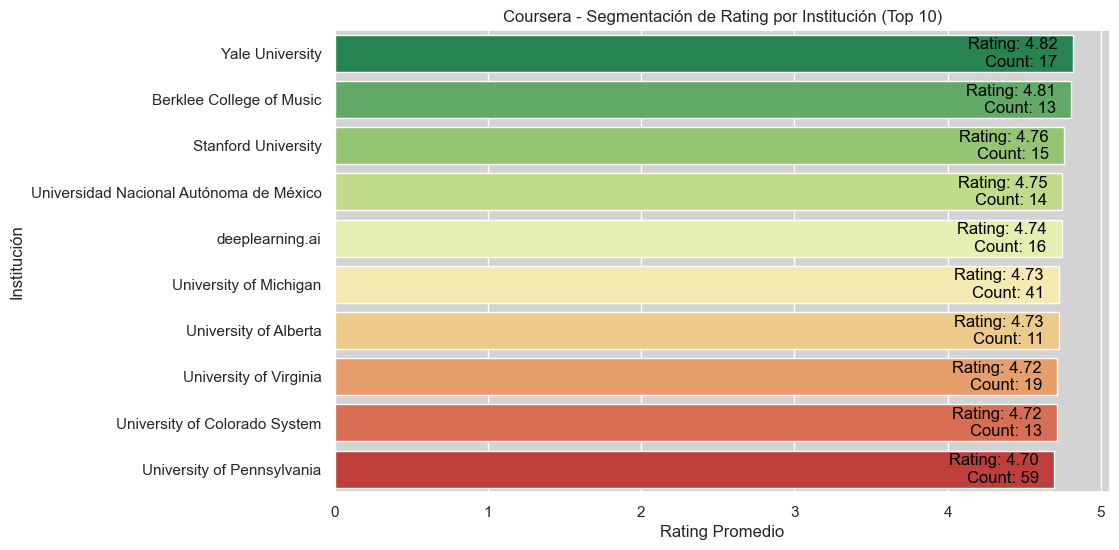

In [75]:
plt.figure(figsize=(10, 6))

# Filtrar las instituciones con al menos 10 cursos para obtener una muestra significativa
filtered_institutions = df_coursera_courses['institution'].value_counts()[df_coursera_courses['institution'].value_counts() >= 10].index

# Filtrar el DataFrame para incluir solo las instituciones seleccionadas
df_filtered = df_coursera_courses[df_coursera_courses['institution'].isin(filtered_institutions)]

# Calcular la media y el recuento de ratings por institución
institution_stats = df_filtered.groupby('institution')['rating'].agg(['mean', 'count'])

# Ordenar las instituciones por rating promedio de menor a mayor
institution_stats = institution_stats.sort_values('mean')

# Obtener las peores 10 instituciones basadas en el rating promedio
worst_institutions = institution_stats.tail(10)

# Crear el gráfico de barras horizontales
ax = sns.barplot(x='mean', y=worst_institutions.index, data=worst_institutions, palette='RdYlGn')

# Añadir etiquetas con el valor de rating y la cantidad de puntuaciones en las barras
for i, (mean_rating, count) in enumerate(zip(worst_institutions['mean'], worst_institutions['count'])):
    ax.text(mean_rating - 0.1, i, f'Rating: {mean_rating:.2f}\nCount: {count}', color='black', ha='right', va='center')

# Invertir el eje y para que las barras vayan de arriba a abajo
ax.invert_yaxis()

# Cambiar el color de fondo del gráfico
ax.set_facecolor('lightgray')

# Etiquetas y título del gráfico
plt.xlabel('Rating Promedio')
plt.ylabel('Institución')
plt.title('Coursera - Segmentación de Rating por Institución (Top 10)')

plt.show()


Peores 10 instituciones por ranking

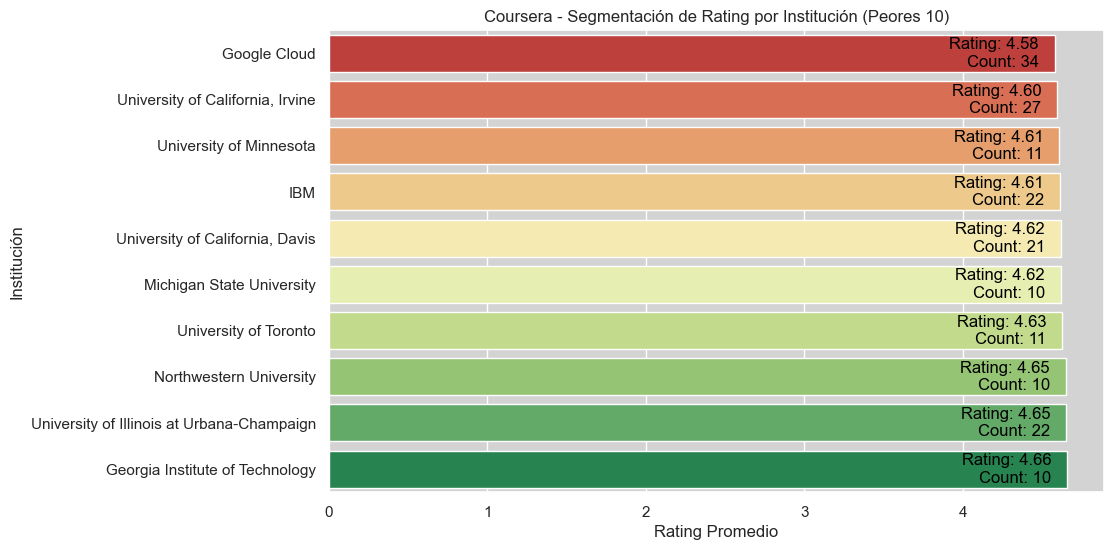

In [66]:
plt.figure(figsize=(10, 6))

# Filtrar las instituciones con al menos 10 cursos para obtener una muestra significativa
filtered_institutions = df_coursera_courses['institution'].value_counts()[df_coursera_courses['institution'].value_counts() >= 10].index

# Filtrar el DataFrame para incluir solo las instituciones seleccionadas
df_filtered = df_coursera_courses[df_coursera_courses['institution'].isin(filtered_institutions)]

# Calcular la media y el recuento de ratings por institución
institution_stats = df_filtered.groupby('institution')['rating'].agg(['mean', 'count'])

# Ordenar las instituciones por rating promedio de menor a mayor
institution_stats = institution_stats.sort_values('mean')

# Obtener las peores 10 instituciones basadas en el rating promedio
worst_institutions = institution_stats.head(10)

# Crear el gráfico de barras horizontales
ax = sns.barplot(x='mean', y=worst_institutions.index, data=worst_institutions, palette='RdYlGn')

# Añadir etiquetas con el valor de rating y la cantidad de puntuaciones en las barras
for i, (mean_rating, count) in enumerate(zip(worst_institutions['mean'], worst_institutions['count'])):
    ax.text(mean_rating - 0.1, i, f'Rating: {mean_rating:.2f}\nCount: {count}', color='black', ha='right', va='center')

# Cambiar el color de fondo del gráfico
ax.set_facecolor('lightgray')

# Etiquetas y título del gráfico
plt.xlabel('Rating Promedio')
plt.ylabel('Institución')
plt.title('Coursera - Segmentación de Rating por Institución (Peores 10)')

plt.show()




### COURSERA - REVIEWS

In [103]:
df_coursera = df_coursera_reviews.merge(df_coursera_id, on='course_id')

In [168]:
df_coursera.head(2)

,reviews,date_reviews,rating,name,institution,sentiment
0,"Pretty dry, but I was able to pass with just t...","Feb 12, 2020",4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,3
1,would be a better experience if the video and ...,"Sep 28, 2020",4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,5


In [105]:
df_coursera.drop(["course_id","reviewers", "course_url"], axis=1,inplace=True)

In [84]:
#Agrego bibliotecas adicionales
from wordcloud import WordCloud
from textblob import TextBlob

In [107]:
# Convertir los valores de la columna "reviews" a cadenas de texto
df_coursera['reviews'] = df_coursera['reviews'].astype(str)

#### `Wordcloud review vs wordcloud courses`: Quiero comparar cuales son las palabras que mas sobresalen en los cursos y en los comentarios de la gente

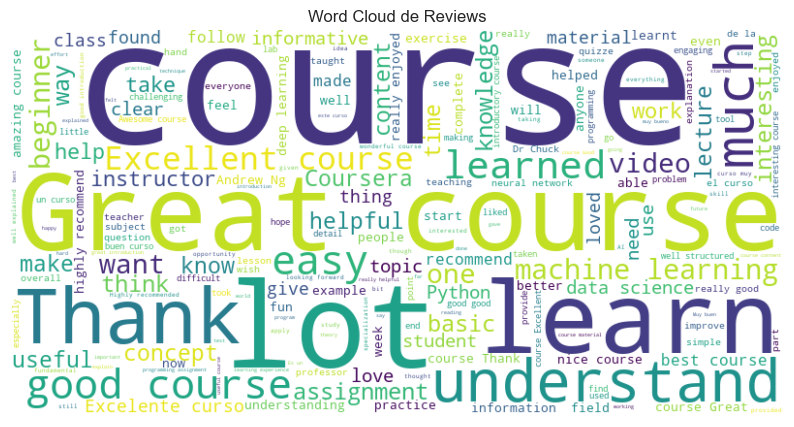

In [79]:
# Concatenar todos los textos de reviews en un solo string
text = ' '.join(df_coursera_reviews['reviews'].tolist())

# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar el WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud de Reviews')
plt.show()


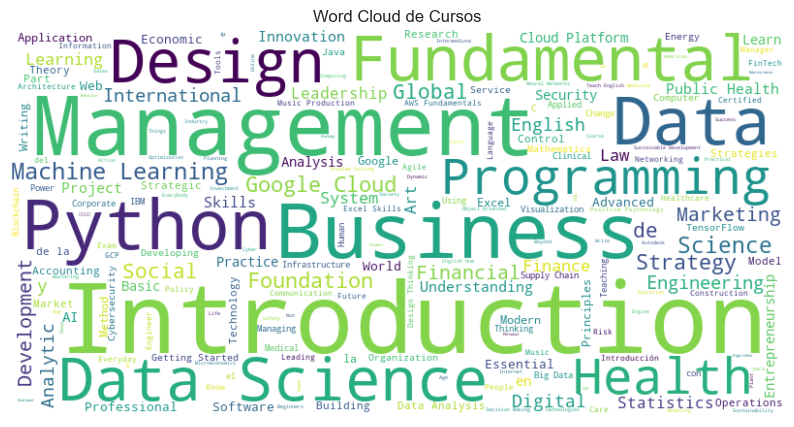

In [110]:
# Concatenar todos los textos de reviews en un solo string
text = ' '.join(df_coursera_courses['name'].tolist())

# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar el WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud de Cursos')
plt.show()

#### `Sentimientos`: Creo una clasificacion de animosidad para mis campo reviews.

Creo la columna "sentiment"

In [108]:
# Crear una función para clasificar la animosidad de una review
def classify_sentiment(review):
    polarity = TextBlob(review).sentiment.polarity
    if polarity >= 0.4:
        return 5  # Muy positivo
    elif polarity >= 0.2:
        return 4  # Positivo
    elif polarity >= -0.2:
        return 3  # Neutral
    elif polarity >= -0.4:
        return 2  # Negativo
    else:
        return 1  # Muy negativo

# Aplicar la función a la columna "reviews" del DataFrame
df_coursera['sentiment'] = df_coursera['reviews'].apply(classify_sentiment)

# Mostrar el DataFrame con la clasificación de sentimientos
print(df_coursera[['reviews', 'sentiment']])


                                                   reviews  sentiment
0        Pretty dry, but I was able to pass with just t...          3
1        would be a better experience if the video and ...          5
2        Information was perfect! The program itself wa...          3
3        A few grammatical mistakes on test made me do ...          3
4        Excellent course and the training provided was...          5
...                                                    ...        ...
1454706                                     Great teacher!          5
1454707                                     Very satisfied          5
1454708                                     awesome course          5
1454709                                     Comprehensive!          3
1454710                                     Great Course!!          5

[1454711 rows x 2 columns]


#### `Ventas-Rating`: Busco cual es la relacion entre cantidad de suscriptos y el rating.

### EDX

In [10]:
df_edx_ETL.describe(include=['object']).T

,count,unique,top,freq
name,853,853,'Talk to me': Improving mental health and suic...,1
course_type,853,2,Self-paced on your time,804
institution,853,106,Harvard University,103
course_difficulty,853,3,Introductory,542
language,853,8,English,692
subtitles,850,31,English,629
course_description,820,820,"Poor mental health affects one in four people,...",1
platform,853,1,edx,853


In [150]:
np.sort(df_edx_ETL.language.unique())

array(['Deutsch', 'English', 'Español', 'Français', 'Italiano',
       'Português', '中文', '日本語'], dtype=object)

In [11]:
df_edx_ETL.head(2)

,name,enrolled,course_type,institution,course_difficulty,language,subtitles,effort(hs)_week,length_weeks,cost,course_description,platform
0,'Talk to me': Improving mental health and suic...,11481,Self-paced on your time,Curtin University,Introductory,English,English,2.5,6,139,"Poor mental health affects one in four people,...",edx
1,18th-Century Opera: Handel & Mozart,18331,Self-paced on your time,Harvard University,Introductory,English,English,3.5,5,99,"In this breathtaking course, you'll get to kno...",edx


#### `Ventas Segun nivel`

In [163]:
np.sort(df_edx_ETL.course_difficulty.unique())

array(['Advanced', 'Intermediate', 'Introductory'], dtype=object)

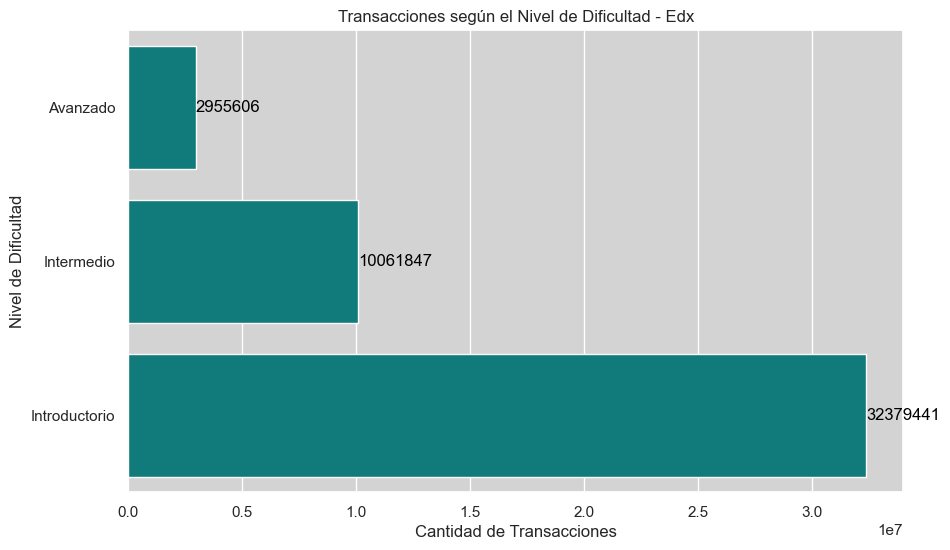

In [166]:
plt.figure(figsize=(10, 6))

# Filtrar los cursos con un costo mayor que cero
prices = df_edx_ETL[df_edx_ETL['cost'] > 0]['cost']
enrollments = df_edx_ETL[df_edx_ETL['cost'] > 0]['enrolled']
difficulty_levels = df_edx_ETL[df_edx_ETL['cost'] > 0]['course_difficulty']

# Calcular la cantidad de transacciones por nivel de dificultad
transactions_counts = enrollments.groupby(difficulty_levels).sum()

# Crear una lista de etiquetas para los niveles de dificultad
difficulty_labels = ['Avanzado', 'Intermedio', 'Introductorio']

# Crear el gráfico de barras horizontales
ax = sns.barplot(x=transactions_counts.values, y=difficulty_labels, color='darkcyan')

# Añadir etiquetas con la cantidad de transacciones en las barras
for i, v in enumerate(transactions_counts.values):
    ax.text(v + 10, i, str(v), color='black', ha='left', va='center')

# Cambiar el color de fondo del gráfico
ax.set_facecolor('lightgray')

# Etiquetas y título del gráfico
plt.xlabel('Cantidad de Transacciones')
plt.ylabel('Nivel de Dificultad')
plt.title('Transacciones según el Nivel de Dificultad - Edx')

plt.show()


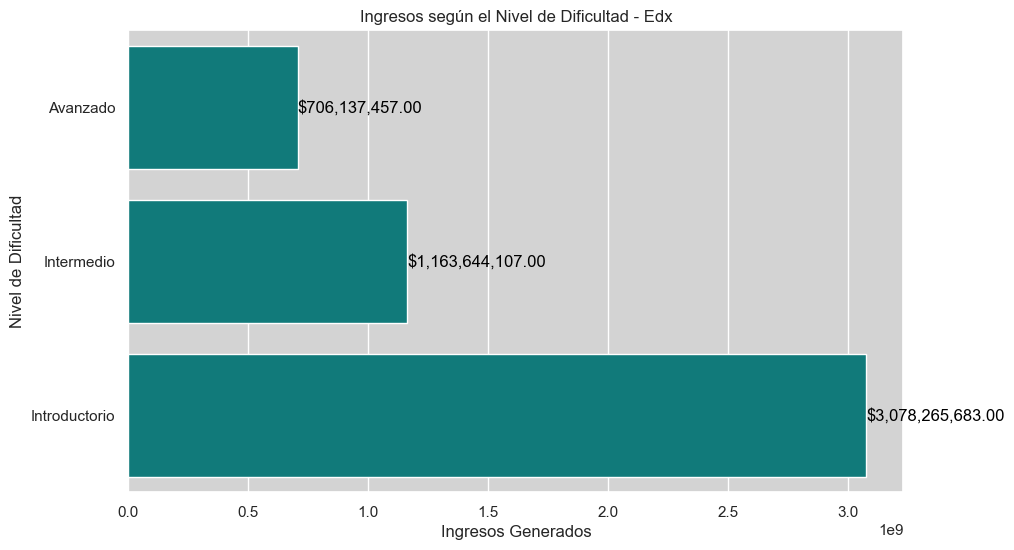

In [164]:
plt.figure(figsize=(10, 6))

# Filtrar los cursos con un costo mayor que cero
prices = df_edx_ETL[df_edx_ETL['cost'] > 0]['cost']
enrollments = df_edx_ETL[df_edx_ETL['cost'] > 0]['enrolled']
difficulty_levels = df_edx_ETL[df_edx_ETL['cost'] > 0]['course_difficulty']

# Obtener los ingresos generados por nivel de dificultad
earnings = prices * enrollments
income_by_difficulty = earnings.groupby(difficulty_levels).sum()

# Crear una lista de etiquetas para los niveles de dificultad
difficulty_labels = ['Avanzado', 'Intermedio', 'Introductorio']

# Crear el gráfico de barras horizontales
ax = sns.barplot(x=income_by_difficulty.values, y=difficulty_labels, color='darkcyan')

# Añadir etiquetas con el dinero generado en las barras
for i, v in enumerate(income_by_difficulty.values):
    ax.text(v + 10, i, '${:,.2f}'.format(v), color='black', ha='left', va='center')

# Cambiar el color de fondo del gráfico
ax.set_facecolor('lightgray')

# Etiquetas y título del gráfico
plt.xlabel('Ingresos Generados')
plt.ylabel('Nivel de Dificultad')
plt.title('Ingresos según el Nivel de Dificultad - Edx')

plt.show()


#### `Ventas segun Idioma`

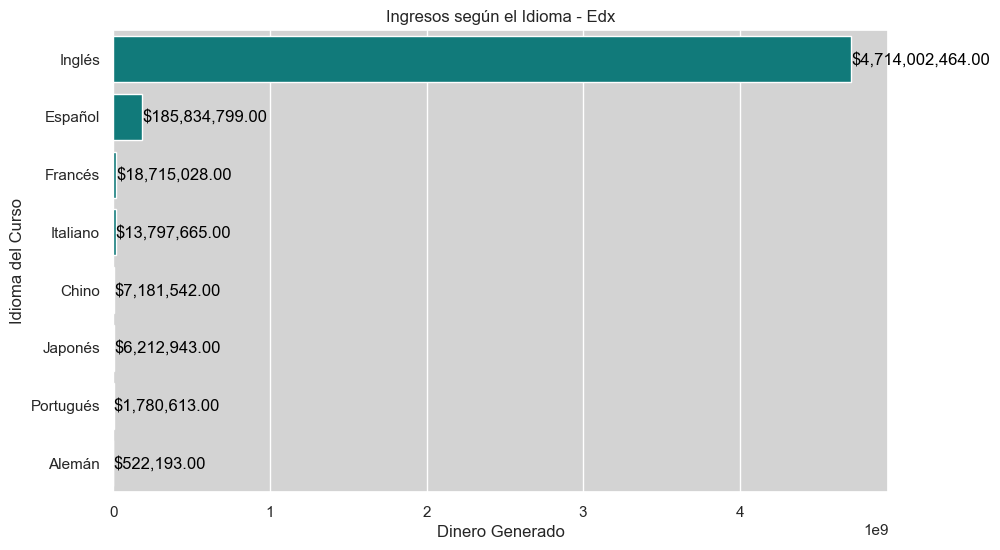

In [151]:
# Diccionario de traducción de idiomas
language_translation = {
    'Deutsch': 'Alemán',
    'English': 'Inglés',
    'Español': 'Español',
    'Français': 'Francés',
    'Italiano': 'Italiano',
    'Português': 'Portugués',
    '中文': 'Chino',
    '日本語': 'Japonés'
}

plt.figure(figsize=(10, 6))

# Filtrar los cursos con un costo mayor que cero
prices = df_edx_ETL[df_edx_ETL['cost'] > 0]['cost']
enrollments = df_edx_ETL[df_edx_ETL['cost'] > 0]['enrolled']
languages = df_edx_ETL[df_edx_ETL['cost'] > 0]['language']

# Calcular los ingresos generados por cada venta
earnings = prices * enrollments

# Obtener los idiomas únicos y sus ingresos generados
language_earnings = earnings.groupby(languages).sum()

# Reemplazar los valores de idioma por su traducción en castellano
language_earnings = language_earnings.rename(index=language_translation)

# Ordenar los idiomas por los ingresos generados
sorted_language_earnings = language_earnings.sort_values(ascending=False)

# Crear el gráfico de barras horizontales
ax = sns.barplot(x=sorted_language_earnings.values, y=sorted_language_earnings.index, color='darkcyan')

# Añadir etiquetas con el dinero generado en las barras
for i, v in enumerate(sorted_language_earnings.values):
    ax.text(v + 10, i, '${:,.2f}'.format(v), color='black', ha='left', va='center')

# Cambiar el color de fondo del gráfico
ax.set_facecolor('lightgray')

# Etiquetas y título del gráfico
plt.xlabel('Dinero Generado')
plt.ylabel('Idioma del Curso')
plt.title('Ingresos según el Idioma - Edx')

plt.show()


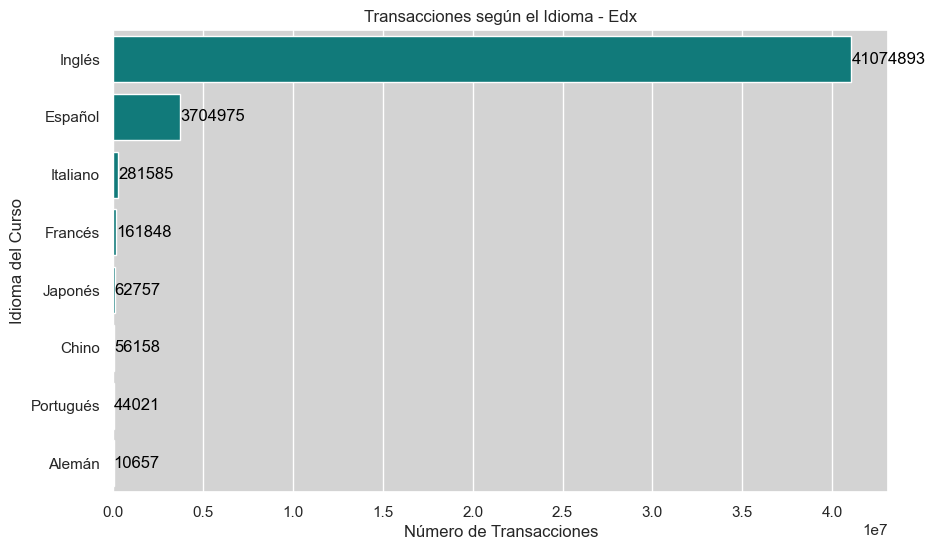

In [152]:
# Diccionario de traducción de idiomas
language_translation = {
    'Deutsch': 'Alemán',
    'English': 'Inglés',
    'Español': 'Español',
    'Français': 'Francés',
    'Italiano': 'Italiano',
    'Português': 'Portugués',
    '中文': 'Chino',
    '日本語': 'Japonés'
}

plt.figure(figsize=(10, 6))

# Filtrar los cursos con un costo mayor que cero
prices = df_edx_ETL[df_edx_ETL['cost'] > 0]['cost']
enrollments = df_edx_ETL[df_edx_ETL['cost'] > 0]['enrolled']
languages = df_edx_ETL[df_edx_ETL['cost'] > 0]['language']

# Obtener el número de transacciones por idioma
transaction_counts = enrollments.groupby(languages).sum()

# Reemplazar los valores de idioma por su traducción en castellano
transaction_counts = transaction_counts.rename(index=language_translation)

# Ordenar los idiomas por el número de transacciones
sorted_transaction_counts = transaction_counts.sort_values(ascending=False)

# Crear el gráfico de barras horizontales
ax = sns.barplot(x=sorted_transaction_counts.values, y=sorted_transaction_counts.index, color='darkcyan')

# Añadir etiquetas con el número de transacciones en las barras
for i, v in enumerate(sorted_transaction_counts.values):
    ax.text(v + 10, i, str(v), color='black', ha='left', va='center')

# Cambiar el color de fondo del gráfico
ax.set_facecolor('lightgray')

# Etiquetas y título del gráfico
plt.xlabel('Número de Transacciones')
plt.ylabel('Idioma del Curso')
plt.title('Transacciones según el Idioma - Edx')

plt.show()


#### `Ventas Segun Precio`

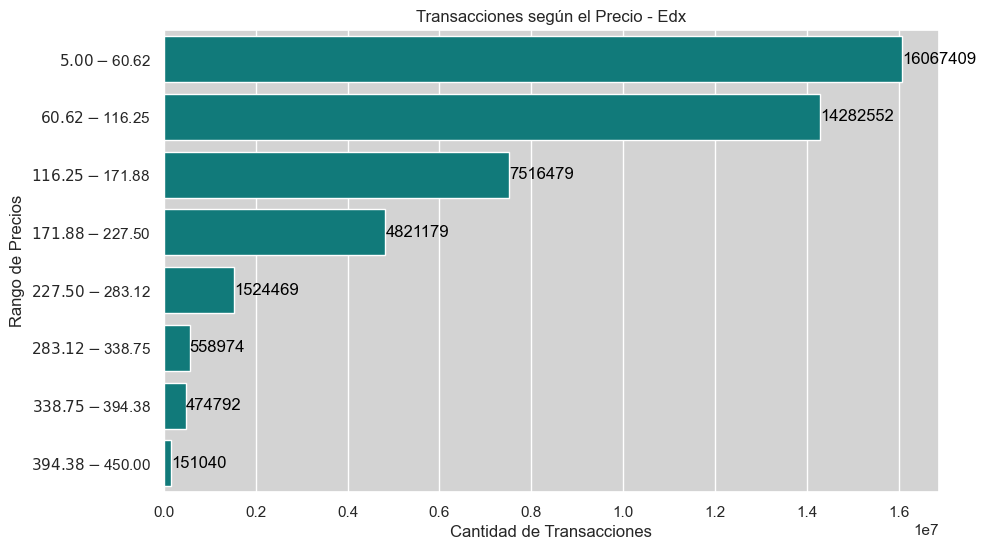

In [143]:
plt.figure(figsize=(10, 6))

# Filtrar los cursos con un costo mayor que cero
prices = df_edx_ETL[df_edx_ETL['cost'] > 0]['cost']
enrollments = df_edx_ETL[df_edx_ETL['cost'] > 0]['enrolled']

# Definir los rangos de precios y el número de intervalos
num_bins = 8
bin_ranges = np.linspace(prices.min(), prices.max(), num_bins + 1)

# Calcular la cantidad de transacciones en cada rango de precios
transactions_counts, _ = np.histogram(prices, bins=bin_ranges, weights=enrollments)

# Crear una lista de etiquetas para los intervalos de precios
price_labels = ['${:.2f}-${:.2f}'.format(bin_ranges[i], bin_ranges[i+1]) for i in range(num_bins)]

# Crear el gráfico de barras horizontales
ax = sns.barplot(x=transactions_counts, y=price_labels, color='darkcyan')

# Añadir etiquetas con la cantidad de transacciones en las barras
for i, v in enumerate(transactions_counts):
    ax.text(v + 10, i, str(v), color='black', ha='left', va='center')

# Cambiar el color de fondo del gráfico
ax.set_facecolor('lightgray')

# Etiquetas y título del gráfico
plt.xlabel('Cantidad de Transacciones')
plt.ylabel('Rango de Precios')
plt.title('Transacciones según el Precio - Edx')

plt.show()


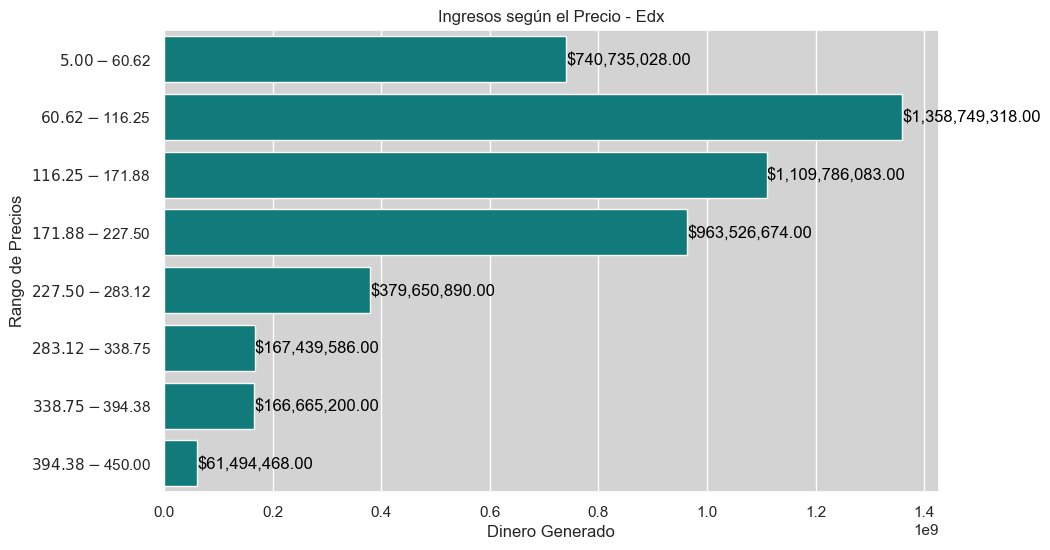

In [136]:
plt.figure(figsize=(10, 6))

# Filtrar los cursos con un costo mayor que cero
prices = df_edx_ETL[df_edx_ETL['cost'] > 0]['cost']
enrollments = df_edx_ETL[df_edx_ETL['cost'] > 0]['enrolled']

# Definir los rangos de precios y el número de intervalos
num_bins = 8
bin_ranges = np.linspace(prices.min(), prices.max(), num_bins + 1)

# Calcular el ingreso generado en cada rango de precios
earnings = prices * enrollments
sales_counts, _ = np.histogram(prices, bins=bin_ranges, weights=earnings)

# Crear una lista de etiquetas para los intervalos de precios
price_labels = ['${:.2f}-${:.2f}'.format(bin_ranges[i], bin_ranges[i+1]) for i in range(num_bins)]

# Crear el gráfico de barras horizontales
ax = sns.barplot(x=sales_counts, y=price_labels, color='darkcyan')

# Añadir etiquetas con el dinero generado en las barras
for i, v in enumerate(sales_counts):
    ax.text(v + 10, i, '${:,.2f}'.format(v), color='black', ha='left', va='center')

# Cambiar el color de fondo del gráfico
ax.set_facecolor('lightgray')

# Etiquetas y título del gráfico
plt.xlabel('Dinero Generado')
plt.ylabel('Rango de Precios')
plt.title('Ingresos según el Precio - Edx')

plt.show()


#### `Wordcloud`: Quiero saber cuales son las palabras mas significativas de los cursos de Edx

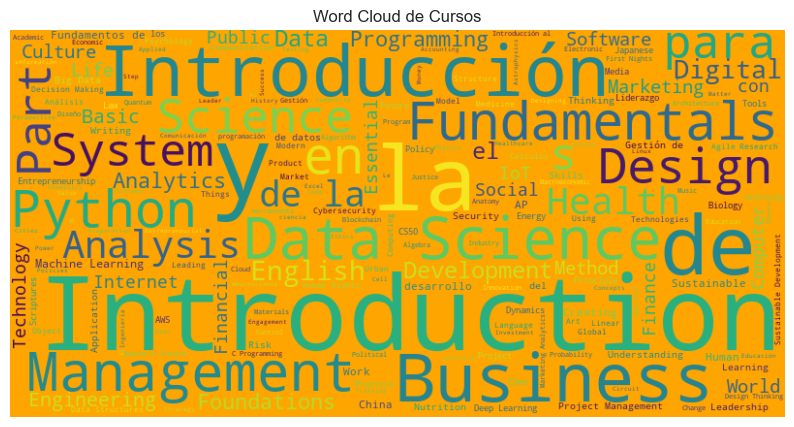

In [148]:
text = ' '.join(df_edx_ETL['name'].tolist())

# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='orange').generate(text)

# Mostrar el WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud de Cursos')
plt.show()

#### `cost`: Creo una Distribución básica del costo 

Text(0.5, 1.0, '\nDistribucion del costo en Edx\n')

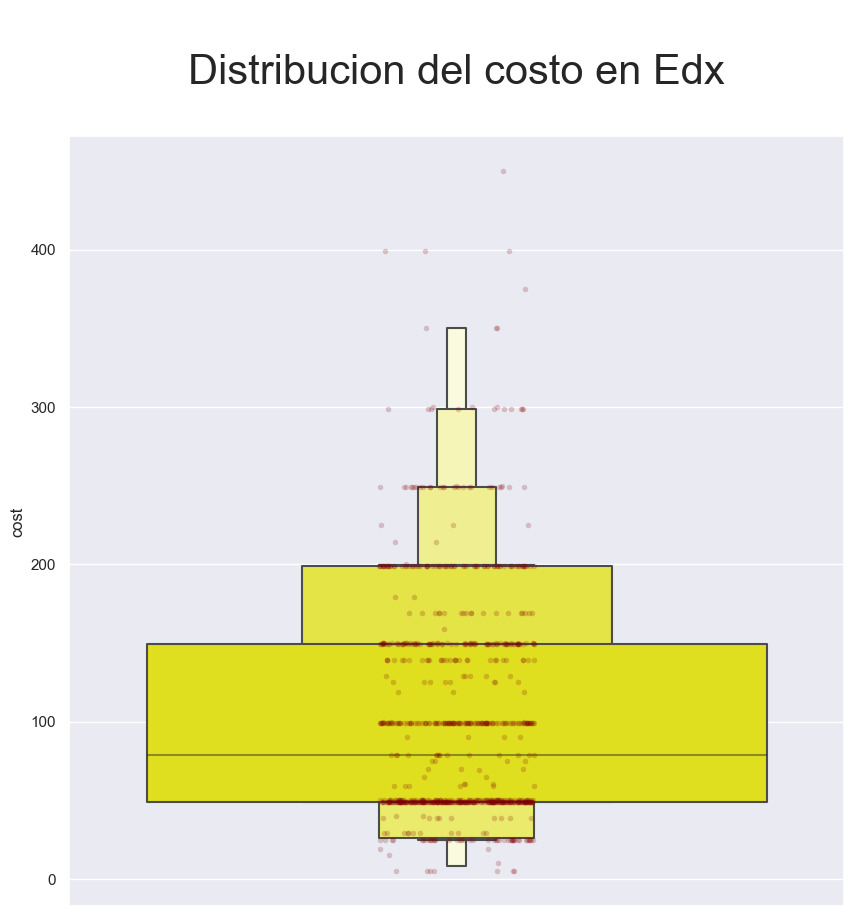

In [12]:
sns.set(rc={'figure.figsize':(10,10)})
ax = sns.boxenplot( y="cost", data=df_edx_ETL,
                   showfliers=False,color='yellow')
ax = sns.stripplot( y="cost", data=df_edx_ETL,
                   size=4, color="maroon",alpha=0.2)
ax.axes.set_title("\nDistribucion del costo en Edx\n",fontsize=30)

Realizo un trazado de costo para obtener una visión general de la distribución. Como podemos observar, tenemos que casi el 2% de la distribuccion esta situado en los cursos de EDX un poco mas de 50 usd, lo que nos indica que los estudiantes o pueden gastos moderados de aproximandamente estos valores o que prefieran ir a varios cursos de 50 usd en vez de uno mas caro, etc.

Text(0.5, 1.0, '\nDistribucion del costo en Edx\n')

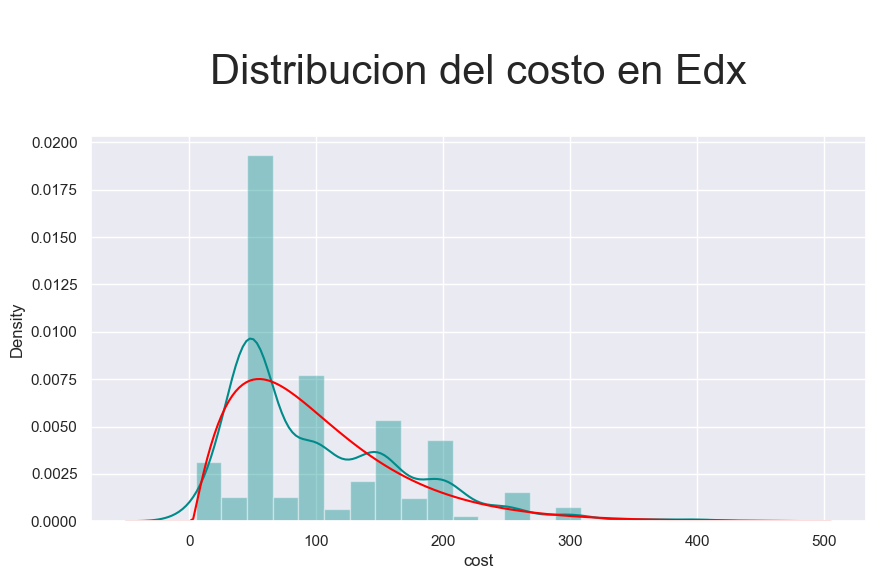

In [13]:
sns.set(rc={'figure.figsize':(10,5)})
p=sns.distplot(df_edx_ETL['cost'],color='darkcyan',fit_kws={"color":"red"},fit=stats.gamma, label="label 1")
p.axes.set_title("\nDistribucion del costo en Edx\n",fontsize=30)

#### `Diff-Weeks`: Realizo un grafico mostrando la frecuencia segun la dificultad (Relacion semanas-Difucultad).

Text(0.5, 1.0, '\nDistribucion de frecuencias basada en la Dificultad\n')

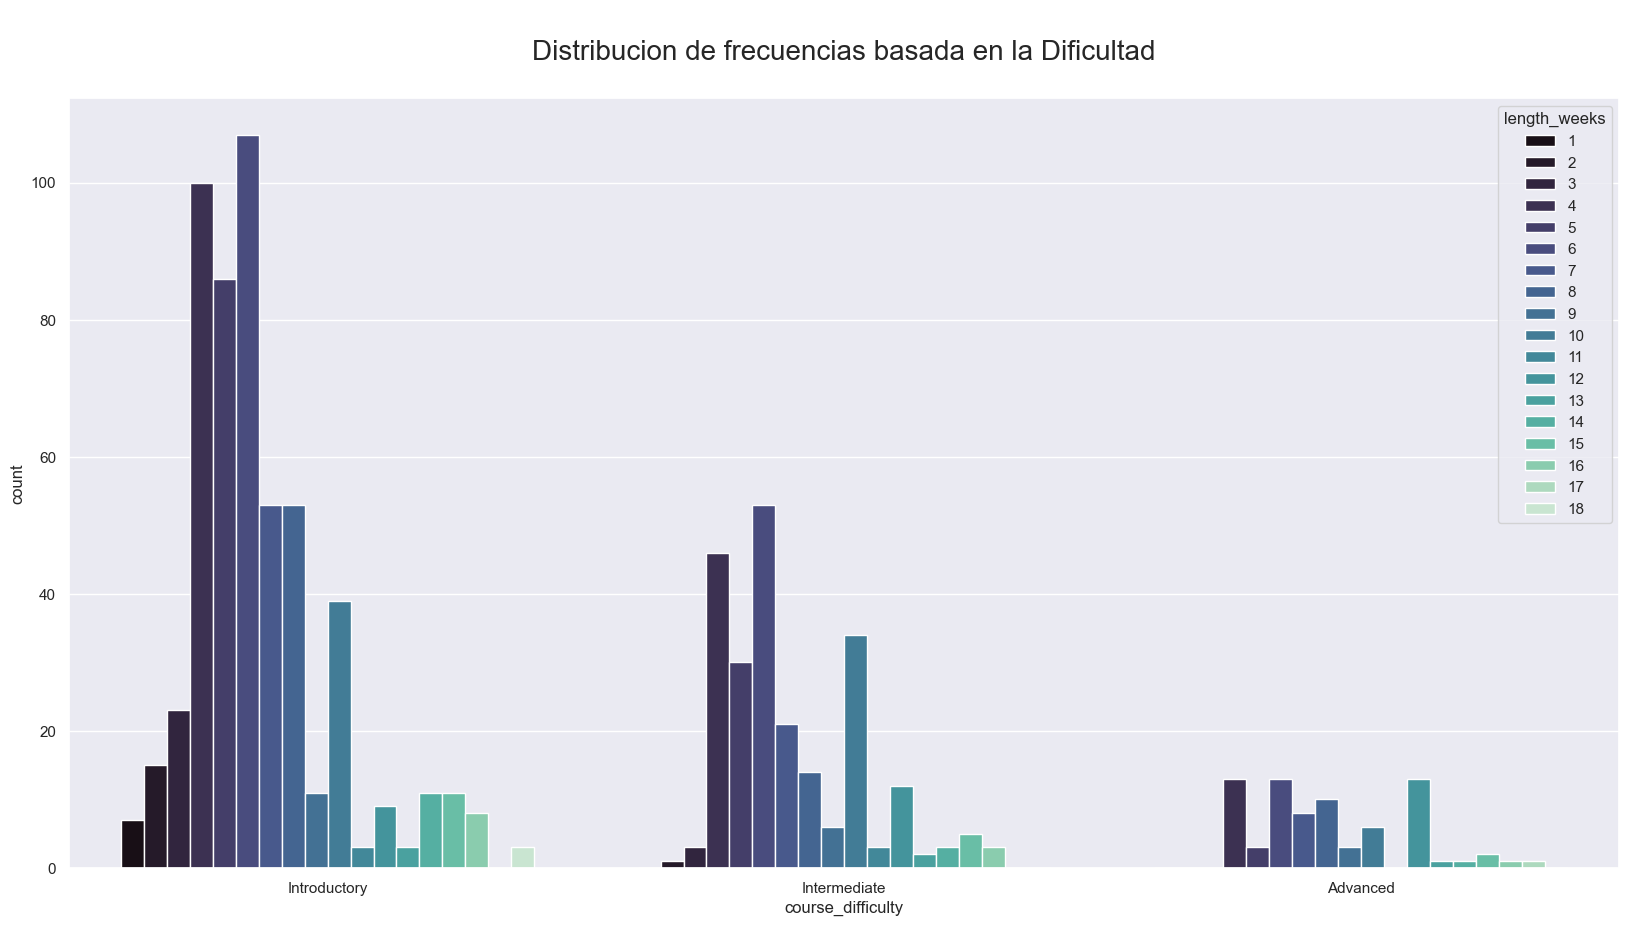

In [14]:
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.countplot(hue="length_weeks", x="course_difficulty", data=df_edx_ETL,palette="mako")
ax.axes.set_title("\nDistribucion de frecuencias basada en la Dificultad\n",fontsize=20)

### UDEMY

In [15]:
df_udemy_ETL.describe(include=['object']).T

,count,unique,top,freq
name,3663,3663,#1 Piano Hand Coordination: Play 10th Ballad i...,1
course_difficulty,3663,4,All Levels,1924
date,3663,1209,2017-05-01,21
subject,3663,4,Web Development,1196
platform,3663,1,udemy,3663


In [16]:
df_udemy_ETL = df_udemy_ETL.rename(columns={'length_weeks': 'length_hs'})

In [17]:
df_udemy_ETL.head(2)

,name,cost,enrolled,course_difficulty,duration_wk,date,subject,platform
0,#1 Piano Hand Coordination: Play 10th Ballad i...,35,3137,All Levels,1.5,2014-09-18,Musical Instruments,udemy
1,#10 Hand Coordination - Transfer Chord Ballad ...,75,1593,Intermediate Level,1.0,2017-04-12,Musical Instruments,udemy


#### `Ventas Segun nivel`

In [159]:
np.sort(df_udemy_ETL.course_difficulty.unique())

array(['All Levels', 'Beginner Level', 'Expert Level',
       'Intermediate Level'], dtype=object)

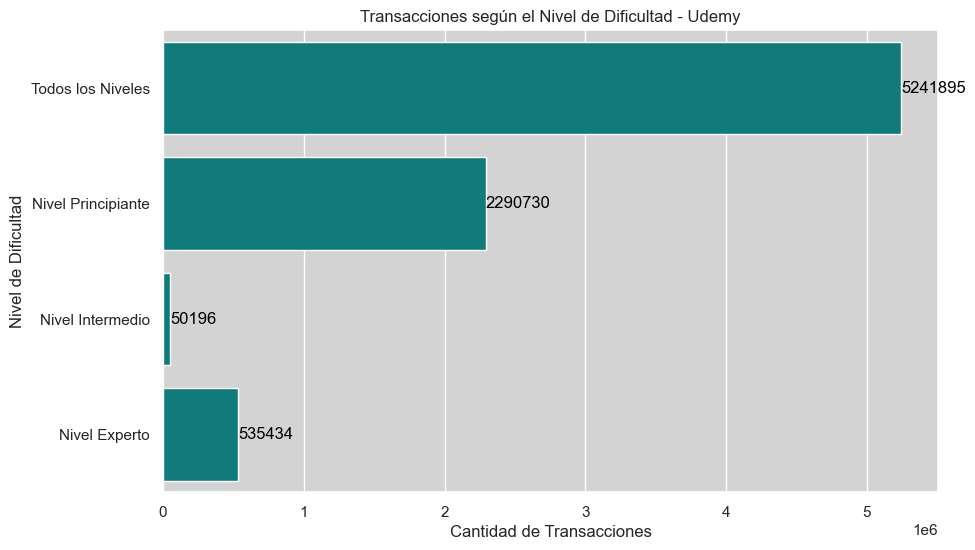

In [161]:
plt.figure(figsize=(10, 6))

# Filtrar los cursos con un costo mayor que cero
prices = df_udemy_ETL[df_udemy_ETL['cost'] > 0]['cost']
enrollments = df_udemy_ETL[df_udemy_ETL['cost'] > 0]['enrolled']
difficulty_levels = df_udemy_ETL[df_udemy_ETL['cost'] > 0]['course_difficulty']

# Obtener el número de transacciones por nivel de dificultad
transaction_counts = enrollments.groupby(difficulty_levels).sum()

# Crear una lista de etiquetas para los niveles de dificultad
difficulty_labels = ['Todos los Niveles', 'Nivel Principiante', 'Nivel Intermedio', 'Nivel Experto']

# Crear el gráfico de barras horizontales
ax = sns.barplot(x=transaction_counts.values, y=difficulty_labels, color='darkcyan')

# Añadir etiquetas con la cantidad de transacciones en las barras
for i, v in enumerate(transaction_counts.values):
    ax.text(v + 10, i, str(v), color='black', ha='left', va='center')

# Cambiar el color de fondo del gráfico
ax.set_facecolor('lightgray')

# Etiquetas y título del gráfico
plt.xlabel('Cantidad de Transacciones')
plt.ylabel('Nivel de Dificultad')
plt.title('Transacciones según el Nivel de Dificultad - Udemy')

plt.show()




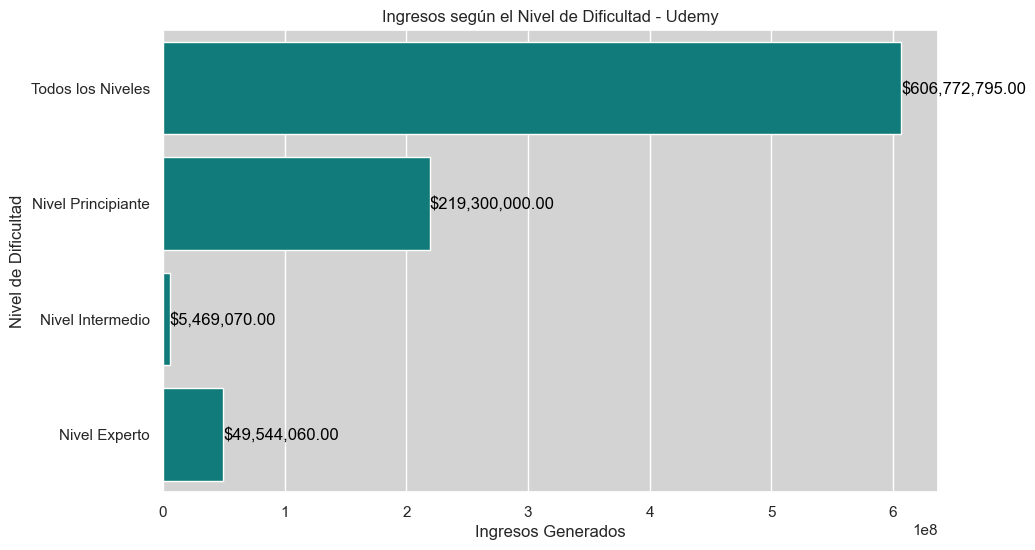

In [162]:
plt.figure(figsize=(10, 6))

# Filtrar los cursos con un costo mayor que cero
prices = df_udemy_ETL[df_udemy_ETL['cost'] > 0]['cost']
enrollments = df_udemy_ETL[df_udemy_ETL['cost'] > 0]['enrolled']
difficulty_levels = df_udemy_ETL[df_udemy_ETL['cost'] > 0]['course_difficulty']

# Obtener los ingresos generados por nivel de dificultad
earnings = prices * enrollments
income_by_difficulty = earnings.groupby(difficulty_levels).sum()

# Crear una lista de etiquetas para los niveles de dificultad
difficulty_labels = ['Todos los Niveles', 'Nivel Principiante', 'Nivel Intermedio', 'Nivel Experto']

# Crear el gráfico de barras horizontales
ax = sns.barplot(x=income_by_difficulty.values, y=difficulty_labels, color='darkcyan')

# Añadir etiquetas con el dinero generado en las barras
for i, v in enumerate(income_by_difficulty.values):
    ax.text(v + 10, i, '${:,.2f}'.format(v), color='black', ha='left', va='center')

# Cambiar el color de fondo del gráfico
ax.set_facecolor('lightgray')

# Etiquetas y título del gráfico
plt.xlabel('Ingresos Generados')
plt.ylabel('Nivel de Dificultad')
plt.title('Ingresos según el Nivel de Dificultad - Udemy')

plt.show()


#### `Ventas Segun Precio`

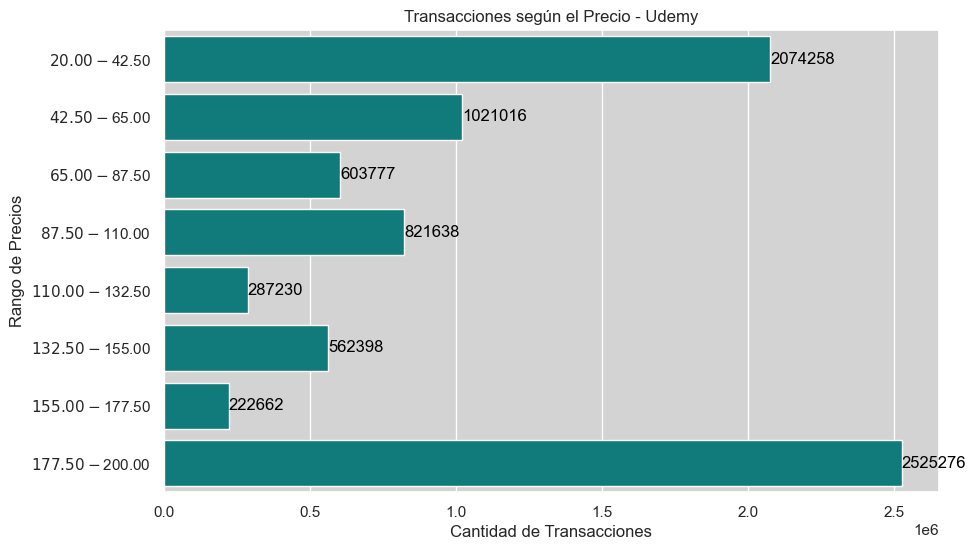

In [139]:
plt.figure(figsize=(10, 6))

# Filtrar los cursos con un costo mayor que cero
prices = df_udemy_ETL[df_udemy_ETL['cost'] > 0]['cost']
enrollments = df_udemy_ETL[df_udemy_ETL['cost'] > 0]['enrolled']

# Definir los rangos de precios y el número de intervalos
num_bins = 8
bin_ranges = np.linspace(prices.min(), prices.max(), num_bins + 1)

# Calcular la cantidad de transacciones en cada rango de precios
transactions_counts, _ = np.histogram(prices, bins=bin_ranges, weights=enrollments)

# Crear una lista de etiquetas para los intervalos de precios
price_labels = ['${:.2f}-${:.2f}'.format(bin_ranges[i], bin_ranges[i+1]) for i in range(num_bins)]

# Crear el gráfico de barras horizontales
ax = sns.barplot(x=transactions_counts, y=price_labels, color='darkcyan')

# Añadir etiquetas con la cantidad de transacciones en las barras
for i, v in enumerate(transactions_counts):
    ax.text(v + 10, i, str(v), color='black', ha='left', va='center')

# Cambiar el color de fondo del gráfico
ax.set_facecolor('lightgray')

# Etiquetas y título del gráfico
plt.xlabel('Cantidad de Transacciones')
plt.ylabel('Rango de Precios')
plt.title('Transacciones según el Precio - Udemy')

plt.show()


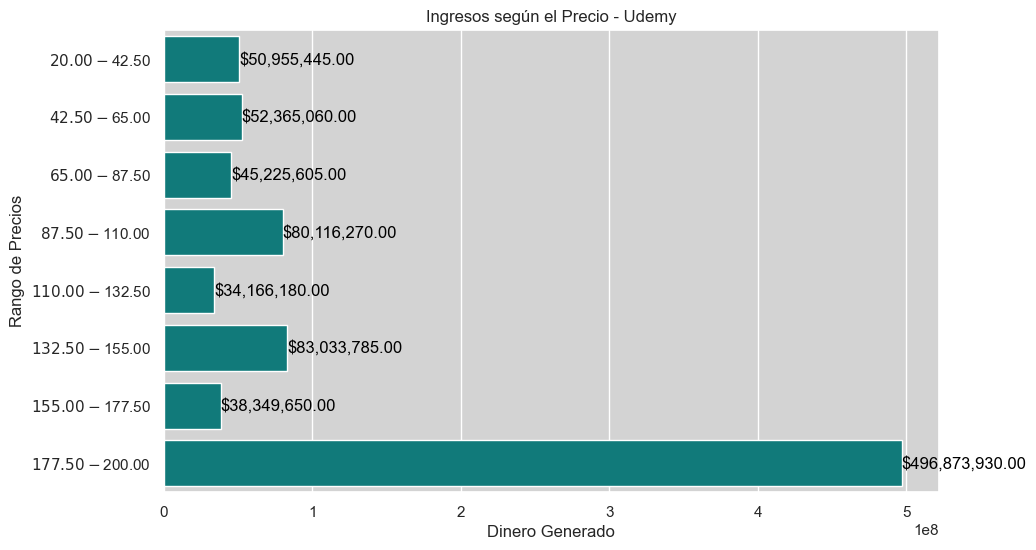

In [144]:
plt.figure(figsize=(10, 6))

# Filtrar los cursos con un costo mayor que cero
prices = df_udemy_ETL[df_udemy_ETL['cost'] > 0]['cost']
enrollments = df_udemy_ETL[df_udemy_ETL['cost'] > 0]['enrolled']

# Definir los rangos de precios y el número de intervalos
num_bins = 8
bin_ranges = np.linspace(prices.min(), prices.max(), num_bins + 1)

# Calcular el ingreso generado en cada rango de precios
earnings = prices * enrollments
sales_counts, _ = np.histogram(prices, bins=bin_ranges, weights=earnings)

# Crear una lista de etiquetas para los intervalos de precios
price_labels = ['${:.2f}-${:.2f}'.format(bin_ranges[i], bin_ranges[i+1]) for i in range(num_bins)]

# Crear el gráfico de barras horizontales
ax = sns.barplot(x=sales_counts, y=price_labels, color='darkcyan')

# Añadir etiquetas con el dinero generado en las barras
for i, v in enumerate(sales_counts):
    ax.text(v + 10, i, '${:,.2f}'.format(v), color='black', ha='left', va='center')

# Cambiar el color de fondo del gráfico
ax.set_facecolor('lightgray')

# Etiquetas y título del gráfico
plt.xlabel('Dinero Generado')
plt.ylabel('Rango de Precios')
plt.title('Ingresos según el Precio - Udemy')

plt.show()

#### `Wordcloud`: Veo cuales son las palabras mas significativas de mis cursos en Udemy

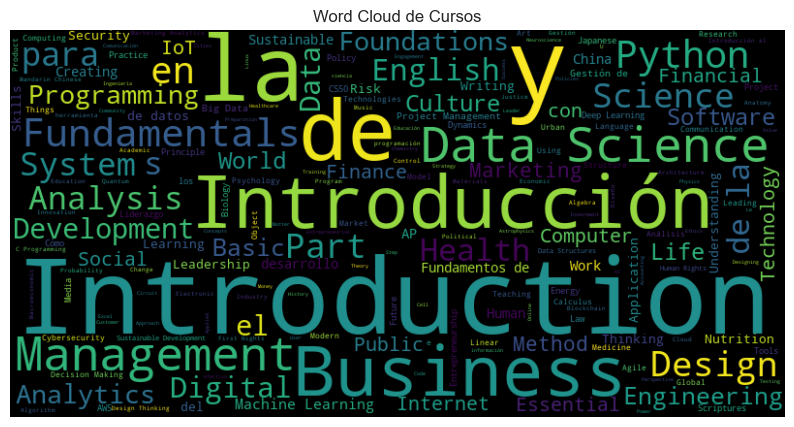

In [146]:
ext = ' '.join(df_udemy_ETL['name'].tolist())

# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

# Mostrar el WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud de Cursos')
plt.show()

#### `cost`: Creo una Distribución básica del costo

Text(0.5, 1.0, '\nDistribucion del costo en Udemy\n')

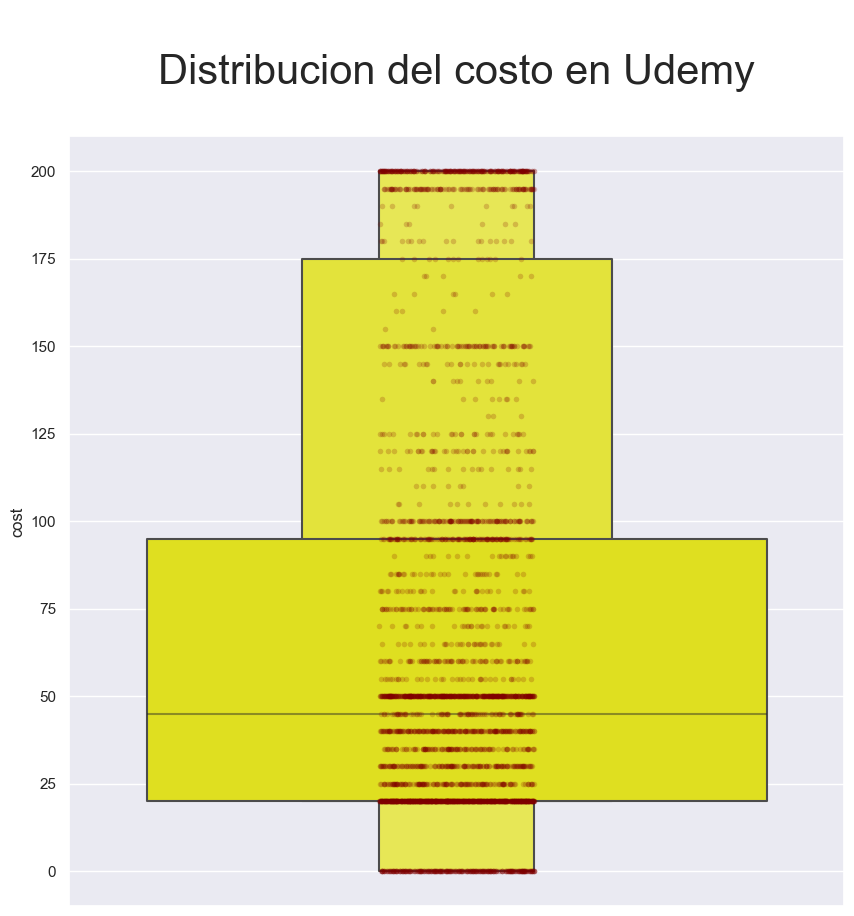

In [18]:
sns.set(rc={'figure.figsize':(10,10)})
ax = sns.boxenplot( y="cost", data=df_udemy_ETL,
                   showfliers=False,color='yellow')
ax = sns.stripplot( y="cost", data=df_udemy_ETL,
                   size=4, color="maroon",alpha=0.2)
ax.axes.set_title("\nDistribucion del costo en Udemy\n",fontsize=30)

Realizo un trazado de costo para obtener una visión general de la distribución. Como podemos ver, mas de un 3% de nuestra distribucion se centra en cursos gratuitos, y por consiguiente los que estan alrededor de 50 usd con poco mas del 2.5%

Text(0.5, 1.0, '\nDistribucion del costo en Udemy\n')

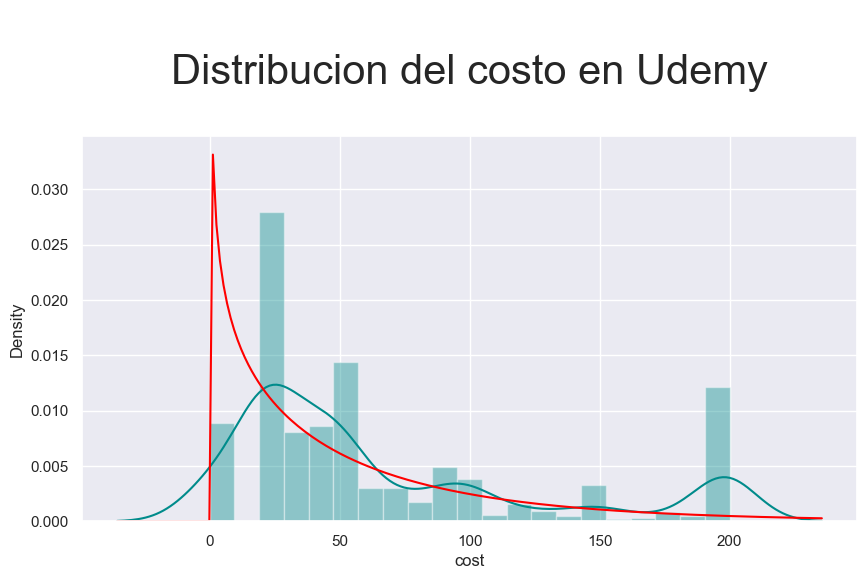

In [19]:
sns.set(rc={'figure.figsize':(10,5)})
p=sns.distplot(df_udemy_ETL['cost'],color='darkcyan',fit_kws={"color":"red"},fit=stats.gamma, label="label 1")
p.axes.set_title("\nDistribucion del costo en Udemy\n",fontsize=30)

#### `Diff-Cost`: Realizo un grafico mostrando la frecuencia segun la dificultad (Relacion costo-Dificultad).

Text(0.5, 1.0, '\nDistribucion de frecuencias basada en la Dificultad\n')

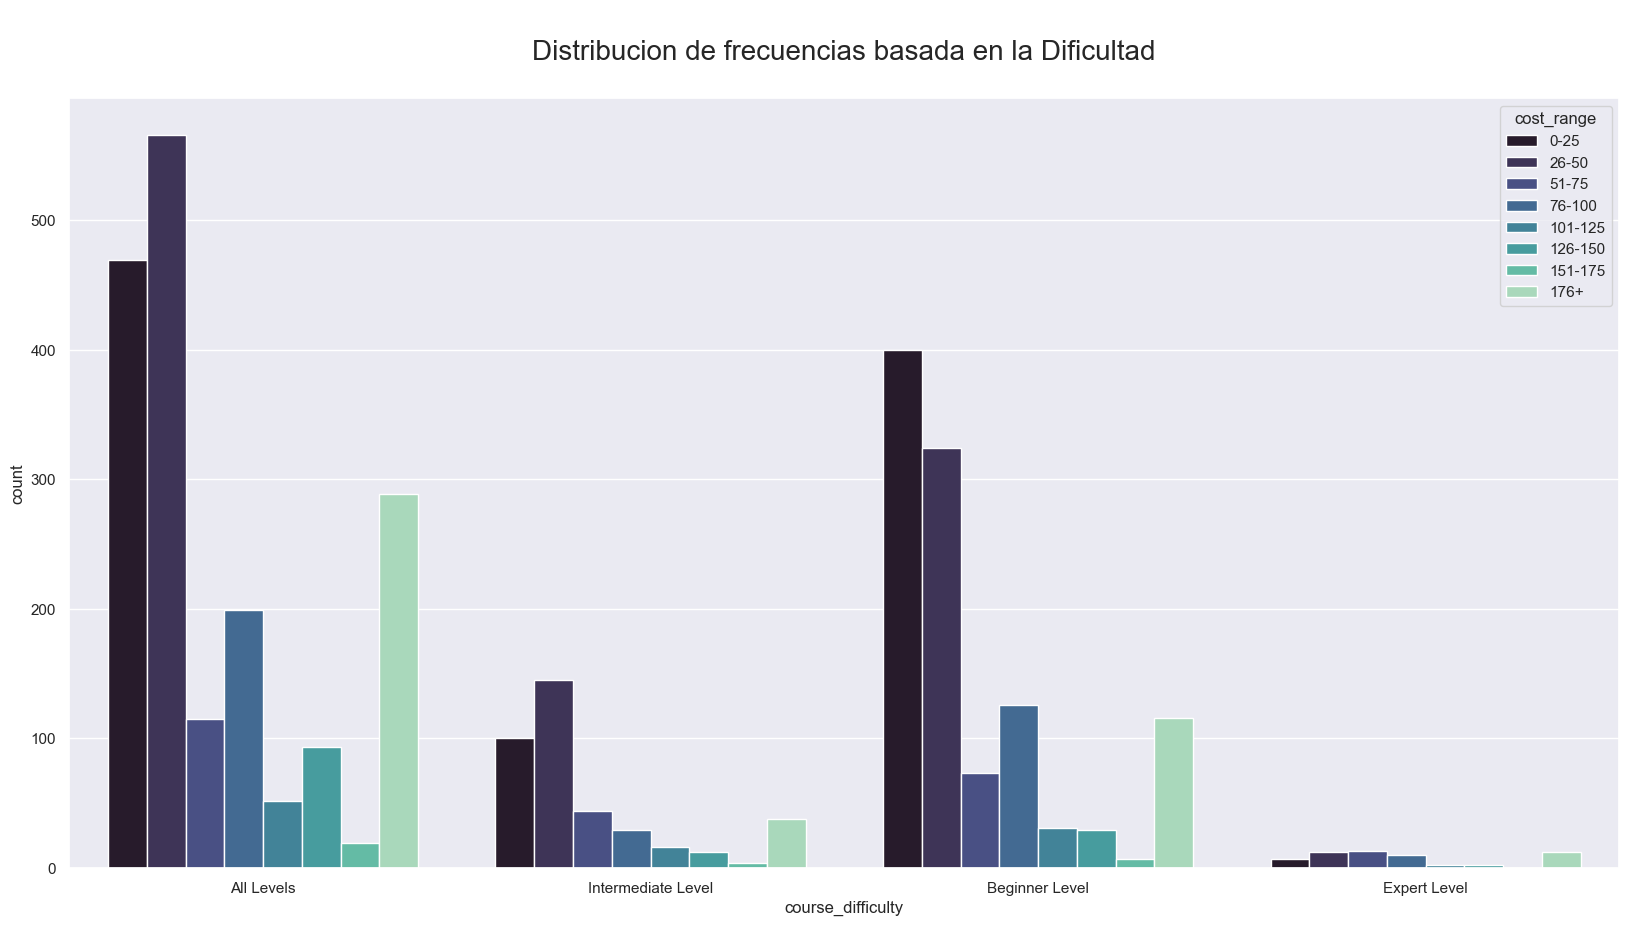

In [20]:
#Creo el campo "cost_range", el cual me va a ayuadar a presentar mejor mi análisis.
df_udemy_ETL["cost_range"] = pd.cut(df_udemy_ETL["cost"], bins=[0, 25, 50, 75, 100, 125, 150, 175, float('inf')], labels=["0-25", "26-50", "51-75", "76-100","101-125","126-150","151-175","176+"])

sns.set(rc={'figure.figsize':(20,10)})
ax = sns.countplot(hue="cost_range", x="course_difficulty", data=df_udemy_ETL,palette="mako")
ax.axes.set_title("\nDistribucion de frecuencias basada en la Dificultad\n",fontsize=20)

#### `KPI-T`: (Udemy) Kpi principal-Tasa de conversion de inscriptos gratuitos a pagos  
El objetivo a futuro propuesto por la empresa es evaluar si en la tendencia se logra incrementar esta tasa en un 15% en comparación con el año anterior  
[enrolled (cost>0)/enrolled (cost=0)]*100 



In [21]:
df_udemy_ETL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3663 entries, 0 to 3662
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   name               3663 non-null   object  
 1   cost               3663 non-null   int64   
 2   enrolled           3663 non-null   int64   
 3   course_difficulty  3663 non-null   object  
 4   duration_wk        3663 non-null   float64 
 5   date               3663 non-null   object  
 6   subject            3663 non-null   object  
 7   platform           3663 non-null   object  
 8   cost_range         3354 non-null   category
dtypes: category(1), float64(1), int64(2), object(5)
memory usage: 233.0+ KB


Tasa de conversíon de inscriptos gratuitos a pagos

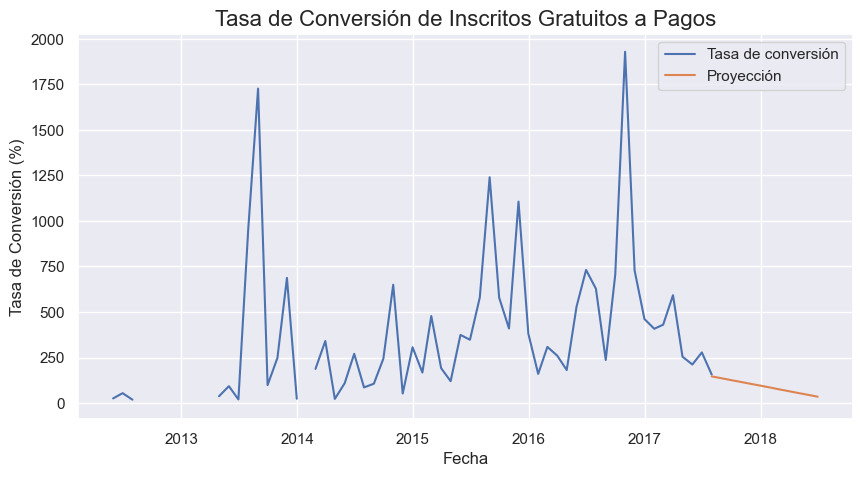

In [25]:


# Convertir la columna "date" en tipo datetime
df_udemy_ETL["date"] = pd.to_datetime(df_udemy_ETL["date"])

# Filtrar los datos para obtener inscritos gratuitos y pagados
inscritos_gratuitos = df_udemy_ETL[df_udemy_ETL["cost"] == 0]
inscritos_pagados = df_udemy_ETL[df_udemy_ETL["cost"] > 0]

# Establecer la columna "date" como índice
inscritos_gratuitos.set_index("date", inplace=True)
inscritos_pagados.set_index("date", inplace=True)

# Agrupar por mes y calcular la cantidad de inscritos gratuitos y pagados en cada mes
inscritos_gratuitos_por_mes = inscritos_gratuitos.resample("M")["enrolled"].sum()
inscritos_pagados_por_mes = inscritos_pagados.resample("M")["enrolled"].sum()

# Calcular la tasa de conversión por mes
tasa_conversion_por_mes = (inscritos_pagados_por_mes / inscritos_gratuitos_por_mes) * 100

# Crear un DataFrame con las fechas para la proyección del próximo año
fechas_proyeccion = pd.date_range(start=df_udemy_ETL["date"].max(), periods=12, freq="M")

# Calcular la proyección de la tasa de conversión para el próximo año
proyeccion = tasa_conversion_por_mes[-1] + (tasa_conversion_por_mes[-1] - tasa_conversion_por_mes[-2]) * (np.arange(1, 13) / 12)

# Crear la figura y el gráfico de línea
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(tasa_conversion_por_mes.index, tasa_conversion_por_mes.values, label="Tasa de conversión")
ax.plot(fechas_proyeccion, proyeccion, label="Proyección")
ax.set_title("Tasa de Conversión de Inscritos Gratuitos a Pagos", fontsize=16)
ax.set_xlabel("Fecha", fontsize=12)
ax.set_ylabel("Tasa de Conversión (%)", fontsize=12)
ax.legend()

# Mostrar la gráfica
plt.show()


Tasa de conversíon de inscriptos gratuitos a pagos (Último año)

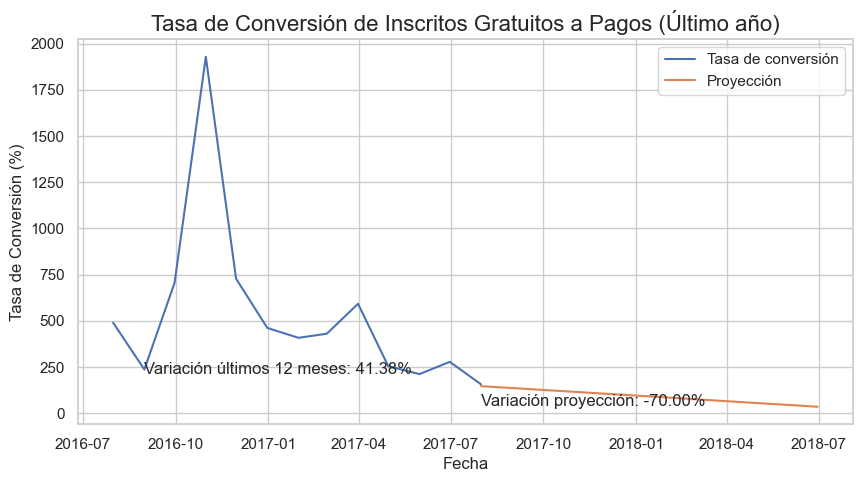

In [32]:
# Convertir la columna "date" en tipo datetime
df_udemy_ETL["date"] = pd.to_datetime(df_udemy_ETL["date"])

# Obtener la fecha más reciente en el DataFrame
fecha_ult_registro = df_udemy_ETL["date"].max()

# Calcular la fecha hace un año a partir de la fecha más reciente
fecha_un_anio_atras = fecha_ult_registro - pd.DateOffset(years=1)

# Filtrar los datos para el período de un año
df_ultimo_anio = df_udemy_ETL[(df_udemy_ETL["date"] >= fecha_un_anio_atras) & (df_udemy_ETL["date"] <= fecha_ult_registro)]

# Filtrar los datos para obtener inscritos gratuitos y pagados en el último año
inscritos_gratuitos = df_ultimo_anio[df_ultimo_anio["cost"] == 0]
inscritos_pagados = df_ultimo_anio[df_ultimo_anio["cost"] > 0]

# Establecer la columna "date" como índice
inscritos_gratuitos.set_index("date", inplace=True)
inscritos_pagados.set_index("date", inplace=True)

# Agrupar por mes y calcular la cantidad de inscritos gratuitos y pagados en cada mes
inscritos_gratuitos_por_mes = inscritos_gratuitos.resample("M")["enrolled"].sum()
inscritos_pagados_por_mes = inscritos_pagados.resample("M")["enrolled"].sum()

# Calcular la tasa de conversión por mes
tasa_conversion_por_mes = (inscritos_pagados_por_mes / inscritos_gratuitos_por_mes) * 100

# Crear un DataFrame con las fechas para el período de los últimos 12 meses
fechas_ultimos_12_meses = pd.date_range(start=fecha_ult_registro - pd.DateOffset(months=11), end=fecha_ult_registro, freq="M")

# Obtener la tasa de conversión de los últimos 12 meses
tasa_conversion_ultimos_12_meses = tasa_conversion_por_mes.loc[fechas_ultimos_12_meses]

# Calcular la variación en los últimos 12 meses
variacion_ultimos_12_meses = tasa_conversion_ultimos_12_meses[-1] - tasa_conversion_ultimos_12_meses[0]

# Crear un DataFrame con las fechas para la proyección del próximo año
fechas_proyeccion = pd.date_range(start=fecha_ult_registro, periods=12, freq="M")

# Calcular la proyección de la tasa de conversión para el próximo año
proyeccion = tasa_conversion_por_mes[-1] + (tasa_conversion_por_mes[-1] - tasa_conversion_por_mes[-2]) * (np.arange(1, 13) / 12)

# Calcular la variación en la tasa de conversión para la proyección
variacion_proyeccion = proyeccion[-1] - proyeccion[0]

# Crear la figura y el gráfico de línea
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(tasa_conversion_por_mes.index, tasa_conversion_por_mes.values, label="Tasa de conversión")
ax.plot(fechas_proyeccion, proyeccion, label="Proyección")
ax.set_title("Tasa de Conversión de Inscritos Gratuitos a Pagos (Último año)", fontsize=16)
ax.set_xlabel("Fecha", fontsize=12)
ax.set_ylabel("Tasa de Conversión (%)", fontsize=12)
ax.legend()

# Limitar la escala del eje y para el período de los últimos 12 meses
# ax.set_ylim([tasa_conversion_ultimos_12_meses.min(), tasa_conversion_ultimos_12_meses.max()])

# Agregar texto con la variación en los últimos 12 meses y la variación en la proyección
texto_variacion_ultimos_12_meses = f"Variación últimos 12 meses: {variacion_ultimos_12_meses:.2f}%"
texto_variacion_proyeccion = f"Variación proyección: {variacion_proyeccion+variacion_ultimos_12_meses:.2f}%"
ax.text(fechas_ultimos_12_meses[0], tasa_conversion_ultimos_12_meses.min() + 2,
        texto_variacion_ultimos_12_meses, fontsize=12)
ax.text(fechas_proyeccion[0], proyeccion.min() + 2,
        texto_variacion_proyeccion, fontsize=12)

# Mostrar la gráfica
plt.show()


`EXPORT`: Guardo mi df_coursera para PBI.

In [170]:
df_coursera.to_csv(r'Datasets/ParaPBI/coursera_PBI.csv',index=False)